# Sampling from a GP

## Preliminary steps

### Loading necessary packages

In [1]:
using Plots
using AugmentedGaussianProcesses
using Distributions
using LinearAlgebra

### Loading the banana dataset from OpenML

In [2]:
kernel = SqExponentialKernel()
x = range(0, 10, length=50)
K = kernelmatrix(kernel, x)
f = rand(MvNormal(K + 1e-8I)) # Sample a random GP
y = rand.(Bernoulli.(AGP.logistic.(f)))
y_sign = sign.(y .- 0.5)

50-element Vector{Float64}:
 -1.0
  1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
  ⋮
 -1.0
 -1.0
 -1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0

### We create a function to visualize the data

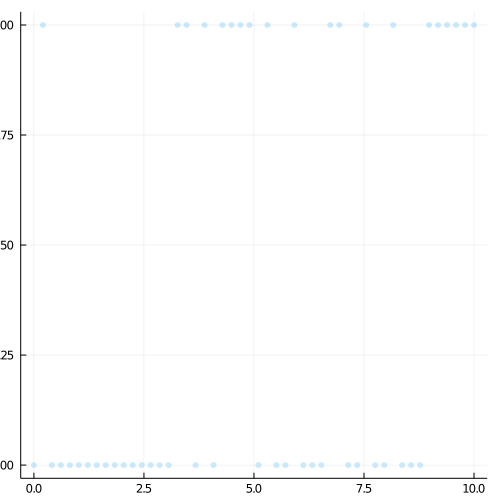

In [3]:
function plot_data(x, y; size=(300,500))
    Plots.scatter(x,
                y,
                alpha=0.2,
                markerstrokewidth=0.0,
                lab="",
                size=size
            )
end
plot_data(x, y; size = (500, 500))

### Run the variational gaussian process approximation

In [4]:
@info "Running full model"
mfull = VGP(x, y_sign,
            kernel,
            LogisticLikelihood(),
            AnalyticVI(),
            optimiser = false
            )
@time train!(mfull, 5)

┌ Info: Running full model
└ @ Main.##475 string:1
  0.852538 seconds (1.13 M allocations: 66.133 MiB, 99.52% compilation time)


### We can also create a sampling based model

In [5]:
@info "Sampling from model"
mmcmc = MCGP(x, y,
            kernel,
            LogisticLikelihood(),
            GibbsSampling(),
            optimiser = false
            )
m = mmcmc
@time samples = sample(mmcmc, 1000)

┌ Info: Sampling from model
└ @ Main.##475 string:1
Sampling with Gibbs Sampler   0%|                       |  ETA: N/A
Sampling with Gibbs Sampler   0%|▏                      |  ETA: 0:06:07
Sampling with Gibbs Sampler   1%|▎                      |  ETA: 0:03:06
Sampling with Gibbs Sampler   1%|▍                      |  ETA: 0:02:04
Sampling with Gibbs Sampler   2%|▍                      |  ETA: 0:01:32
Sampling with Gibbs Sampler   2%|▌                      |  ETA: 0:01:14
Sampling with Gibbs Sampler   3%|▋                      |  ETA: 0:01:01
Sampling with Gibbs Sampler   3%|▊                      |  ETA: 0:00:52
Sampling with Gibbs Sampler   4%|▉                      |  ETA: 0:00:46
Sampling with Gibbs Sampler   4%|█                      |  ETA: 0:00:40
Sampling with Gibbs Sampler   5%|█                      |  ETA: 0:00:36
Sampling with Gibbs Sampler   5%|█▏                     |  ETA: 0:00:33
Sampling with Gibbs Sampler   5%|█▎                     |  ETA: 0:00:30
Sampling with Gi

1000-element Vector{Vector{Vector{Float64}}}:
 [[0.6247071979974189, 0.09054129855745596, -0.4501093133700905, -0.9043154962414316, -1.2497600213816347, -1.4552357197360526, -1.579816313621893, -1.6356535656408417, -1.6806886264180514, -1.6719306859431307  …  0.21864862398184304, 0.3817075318049524, 0.523486762995051, 0.635883528886293, 0.716318627421475, 0.6645173096753199, 0.5530143354893567, 0.30113556418183685, -0.013571862886345487, -0.4139443204383597]]
 [[-0.5268951406582967, -0.5440167270052129, -0.6181241490288778, -0.7618076111275608, -0.9194647401225896, -1.1218381509865714, -1.2911877025621838, -1.446221495379445, -1.5024093167217054, -1.4972523446819839  …  0.7317984629830627, 0.742774799544927, 0.7647943527832874, 0.7466503125975985, 0.7169158354590184, 0.6048623994832281, 0.4610745968877151, 0.25109730616326154, -0.024479458519165442, -0.3376822087854163]]
 [[0.7007827823599632, 0.34137945219602917, -0.15392707796475802, -0.6914652137388589, -1.2622920728653602, -1.76295

### We can now visualize the results of both models

### We first plot the latent function f (truth, the VI estimate, the samples)

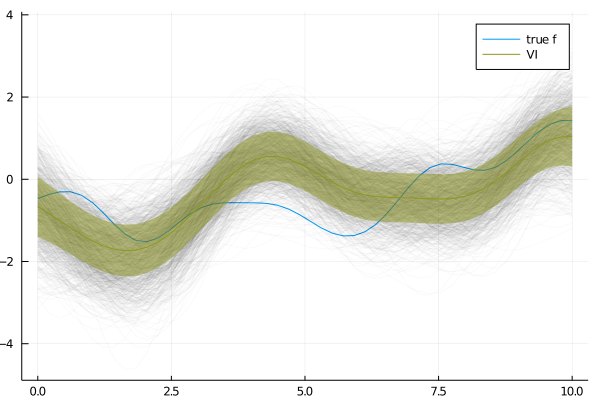

In [6]:
p1 = plot(x, f, label="true f")
plot!(x, samples, label="", color=:black, alpha=0.02, lab="")
plot!(x, mean(mfull[1]), ribbon=sqrt.(var(mfull[1])), label="VI")

### And we can also plot the predictions vs the data

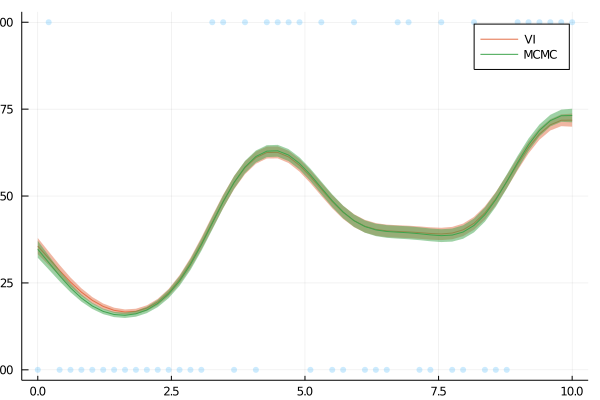

In [7]:
p2 = plot_data(x, y; size=(600,400))
μ_vi, σ_vi = proba_y(mfull, x)
plot!(x, μ_vi; ribbon=σ_vi, label="VI")
μ_mcmc, σ_mcmc = proba_y(mmcmc, x)
plot!(x, μ_mcmc; ribbon=σ_mcmc, label="MCMC")

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*